In [ ]:
import scipy.io
import pandas as pd
from tensorflow import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import InputLayer
from keras.layers import Flatten
from keras.layers import AveragePooling1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.metrics import Accuracy
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
signals = np.genfromtxt('/content/drive/MyDrive/Unивerchик/np_signals.txt')
labels = np.genfromtxt('/content/drive/MyDrive/Unивerchик/np_lables.txt')

In [ ]:
signals.shape

(5323, 2000)

In [ ]:
labels.shape

(5323,)

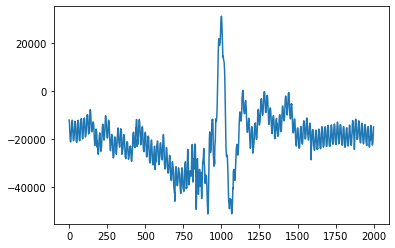

In [ ]:
plt.plot(signals[6])
plt.show()

In [ ]:
labels = keras.utils.to_categorical(labels, num_classes=6)

In [ ]:
print(len(np.where(labels.argmax(axis=1)==0)[0]))
print(len(np.where(labels.argmax(axis=1)==1)[0]))
print(len(np.where(labels.argmax(axis=1)==2)[0]))
print(len(np.where(labels.argmax(axis=1)==3)[0]))
print(len(np.where(labels.argmax(axis=1)==4)[0]))
print(len(np.where(labels.argmax(axis=1)==5)[0]))

872
867
903
812
916
953


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(signals, labels, test_size=0.2, random_state=34, stratify=labels, shuffle=True)

In [ ]:
print(len(np.where(y_train.argmax(axis=1)==0)[0]))
print(len(np.where(y_train.argmax(axis=1)==1)[0]))
print(len(np.where(y_train.argmax(axis=1)==2)[0]))
print(len(np.where(y_train.argmax(axis=1)==3)[0]))
print(len(np.where(y_train.argmax(axis=1)==4)[0]))
print(len(np.where(y_train.argmax(axis=1)==5)[0]))
print('-----------------')
print(len(np.where(y_test.argmax(axis=1)==0)[0]))
print(len(np.where(y_test.argmax(axis=1)==1)[0]))
print(len(np.where(y_test.argmax(axis=1)==2)[0]))
print(len(np.where(y_test.argmax(axis=1)==3)[0]))
print(len(np.where(y_test.argmax(axis=1)==4)[0]))
print(len(np.where(y_test.argmax(axis=1)==5)[0]))

697
694
722
650
733
762
-----------------
175
173
181
162
183
191


In [ ]:
N_classes = 6 #7

model = Sequential()
model.add(InputLayer(input_shape=(2000, )))
model.add(Reshape((2000,1),input_shape=(2000,)))
model.add(BatchNormalization())
model.add(Conv1D(25,40, activation='elu',padding='same', strides=2)) # количество фильтров, длинна фильтра 'relu' #25
model.add(Conv1D(25,20, activation='elu',padding='same'))#25
model.add(Conv1D(20,20, activation='elu',padding='same', strides=2))#25
model.add(Conv1D(25,20, activation='elu',padding='same'))#25
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(20,20, activation='elu',padding='same'))#25
model.add(Conv1D(40,20, activation='elu',padding='same'))#40
model.add(Conv1D(100,20, activation='elu',padding='same'))#100
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(GlobalMaxPooling1D())
model.add(Dense(N_classes, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0009,amsgrad = 'false') # Defaults to 0.001.
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2000, 1)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 2000, 1)           4         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1000, 25)          1025      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1000, 25)          12525     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 500, 20)           10020     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 500, 25)           10025     
_________________________________________________________________
batch_normalization_4 (Batch (None, 500, 25)          

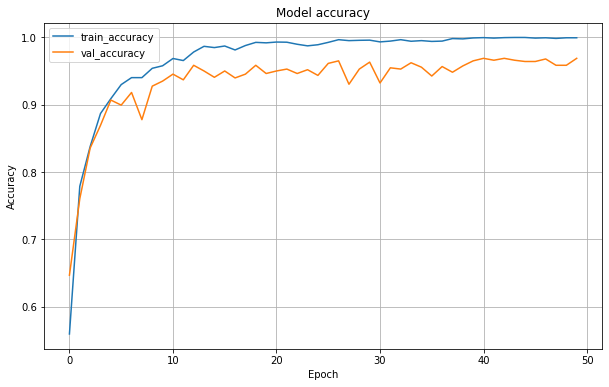

[0.6469483375549316, 0.7605633735656738, 0.8356807231903076, 0.8694835901260376, 0.9070422649383545, 0.8995305299758911, 0.9183098673820496, 0.8779342770576477, 0.9276995062828064, 0.9352112412452698, 0.9455398917198181, 0.937089204788208, 0.9586854577064514, 0.9502347707748413, 0.9408450722694397, 0.9502347707748413, 0.939906120300293, 0.9455398917198181, 0.9586854577064514, 0.9464788436889648, 0.9502347707748413, 0.9530516266822815, 0.9464788436889648, 0.9521126747131348, 0.9436619877815247, 0.9615023732185364, 0.9652582406997681, 0.9305164217948914, 0.9530516266822815, 0.9633802771568298, 0.9323943853378296, 0.9549295902252197, 0.9530516266822815, 0.9624413251876831, 0.9558685421943665, 0.9427229762077332, 0.9568074941635132, 0.9483568072319031, 0.9577465057373047, 0.9652582406997681, 0.9690141081809998, 0.9661971926689148, 0.9690141081809998, 0.9661971926689148, 0.9643192291259766, 0.9643192291259766, 0.9680750966072083, 0.9586854577064514, 0.9586854577064514, 0.9690141081809998]


In [ ]:
EPOCHS = 50
BATCH_SIZE = 30

model_checkpoint_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=EPOCHS,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(X_test, y_test), callbacks=[model_checkpoint_callback])
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
print(history.history['val_accuracy'])

In [ ]:
y_pred = model.predict(X_test)
y_pred_conf = y_pred.argmax(axis=1)
y_pred_conf

array([3, 2, 0, ..., 5, 5, 3])

In [ ]:
y_test_conf = y_test.argmax(axis=1)

Text(33.0, 0.5, 'True labels')

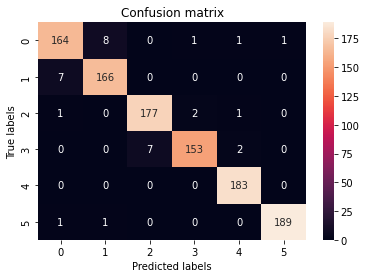

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
ax= plt.subplot()
sb.heatmap(confusion_matrix(y_test_conf, y_pred_conf), annot=True, fmt='g', ax=ax)
ax.set_title('Confusion matrix');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels')

In [ ]:
model.evaluate(signals, labels)

167/167 [==============================] - 1s 5ms/step - loss: 0.0259 - accuracy: 0.9938


[0.025859173387289047, 0.9938004612922668]

# PCA

In [ ]:
N_classes = 6 #7

model1 = Sequential()
model1.add(InputLayer(input_shape=(2000, )))
model1.add(Reshape((2000,1),input_shape=(2000,)))
model1.add(BatchNormalization())
model1.add(Conv1D(25,40, activation='elu',padding='same', strides=2)) # количество фильтров, длинна фильтра 'relu' #25
model1.add(Conv1D(25,20, activation='elu',padding='same'))#25
model1.add(Conv1D(20,20, activation='elu',padding='same', strides=2))#25
model1.add(Conv1D(25,20, activation='elu',padding='same'))#25
model1.add(BatchNormalization())
model1.add(MaxPooling1D(2))
model1.add(Conv1D(20,20, activation='elu',padding='same'))#25
model1.add(Conv1D(40,20, activation='elu',padding='same'))#40
model1.add(Conv1D(100,20, activation='elu',padding='same'))#100
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(2))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(N_classes, activation='linear'))

In [ ]:
model1.set_weights(model.get_weights())

In [ ]:
y_vectors = model1.predict(X_test)

In [ ]:
y_vectors

array([[-3.8447137 , -4.453496  , -0.56387943,  5.880415  , -3.173184  ,
        -7.065405  ],
       [-3.3533146 , -4.7396016 ,  4.070235  ,  1.7564669 , -3.9868937 ,
        -5.548127  ],
       [ 5.6151114 , -1.7761011 , -7.2866187 , -1.4680821 ,  1.1491828 ,
         2.3145278 ],
       ...,
       [ 4.273092  , -5.3336964 , -5.2694206 , -4.5805087 ,  1.4494156 ,
        10.164429  ],
       [ 5.1295657 , -3.5321348 , -8.938648  , -2.0868614 ,  4.203465  ,
        11.787429  ],
       [-3.8217251 , -3.284955  , -2.6340232 ,  7.5661225 , -6.7205853 ,
        -5.3435874 ]], dtype=float32)

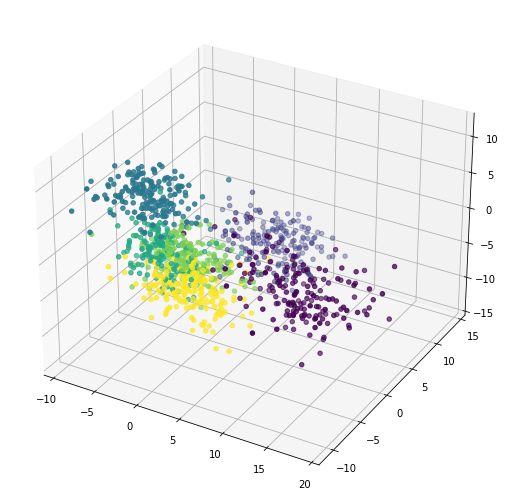

In [ ]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(y_vectors[:, 0], y_vectors[:, 1], y_vectors[:, 2], c = y_test.argmax(axis=1))

In [ ]:
pca = PCA()
pca.fit(y_vectors)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.38578573, 0.32678297, 0.11725504, 0.1025513 , 0.05223687,
       0.01538813], dtype=float32)

<BarContainer object of 6 artists>

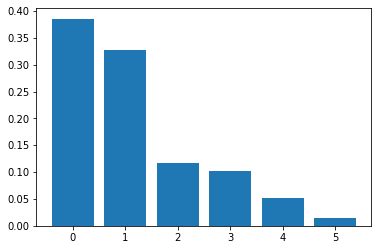

In [ ]:
plt.bar(range(6), pca.explained_variance_ratio_)

In [ ]:
y_vectors_transformed = pca.transform(y_vectors)

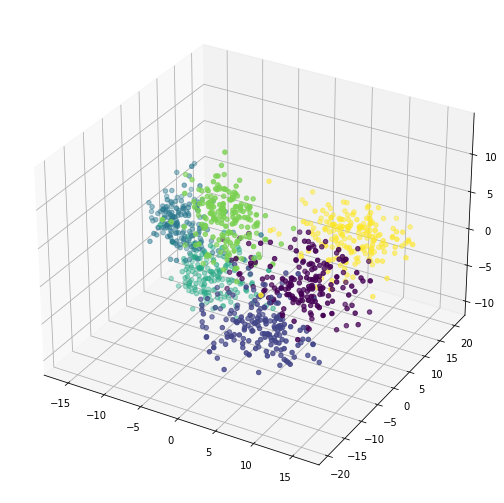

In [ ]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], c = y_test.argmax(axis=1))

In [ ]:
fig = px.scatter_3d(pd.DataFrame(zip(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], y_test.argmax(axis=1)), columns=['PCA 0', 'PCA 1', 'PCA 2', 'color']),
                    x='PCA 0', y='PCA 1', z='PCA 2',
                    color='color')
fig.update_traces(marker_size = 3)
fig.show()

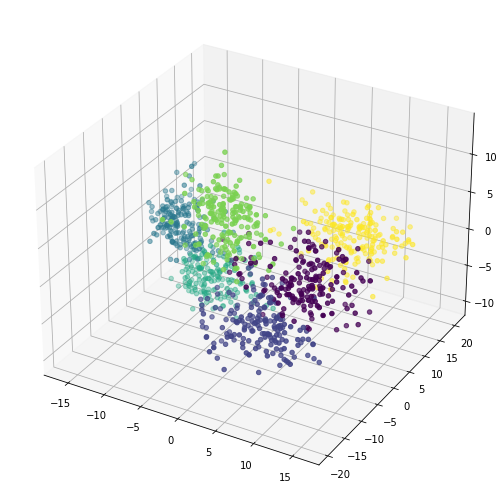

In [ ]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], c = y_pred.argmax(axis=1))

In [ ]:
fig = px.scatter_3d(pd.DataFrame(zip(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], y_pred.argmax(axis=1)), columns=['PCA 0', 'PCA 1', 'PCA 2', 'color']),
                    x='PCA 0', y='PCA 1', z='PCA 2',
                    color='color')
fig.update_traces(marker_size = 3)
fig.show()

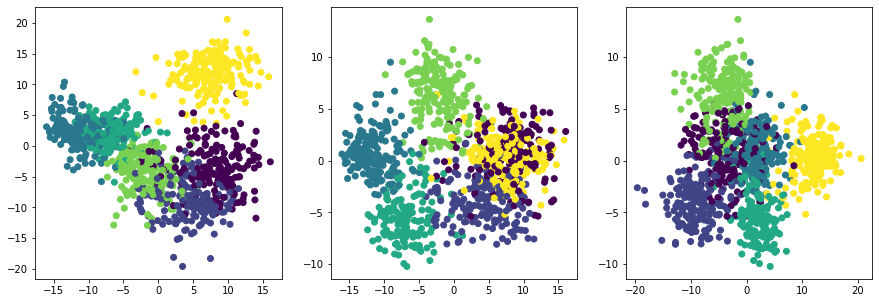

In [ ]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,3,1)
ax1.scatter(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], c = y_pred.argmax(axis=1))

ax2 = fig.add_subplot(1,3,2)
ax2.scatter(y_vectors_transformed[:, 0], y_vectors_transformed[:, 2], c = y_pred.argmax(axis=1))

ax2 = fig.add_subplot(1,3,3)
ax2.scatter(y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], c = y_pred.argmax(axis=1))

In [ ]:
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(y_vectors_transformed[:, :3])

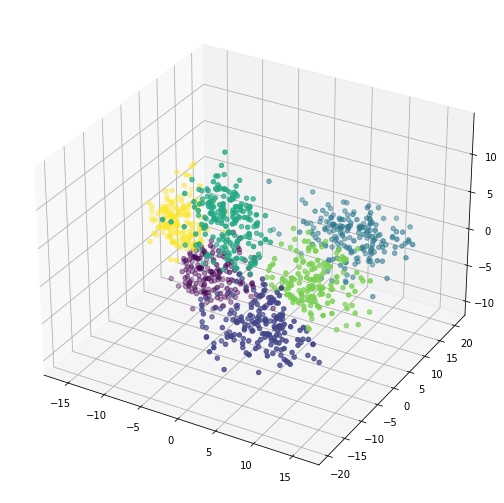

In [ ]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], c = clusters)

In [ ]:
fig = px.scatter_3d(pd.DataFrame(zip(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], clusters), columns=['PCA 0', 'PCA 1', 'PCA 2', 'color']),
                    x='PCA 0', y='PCA 1', z='PCA 2',
                    color='color')
fig.update_traces(marker_size = 3)
fig.show()

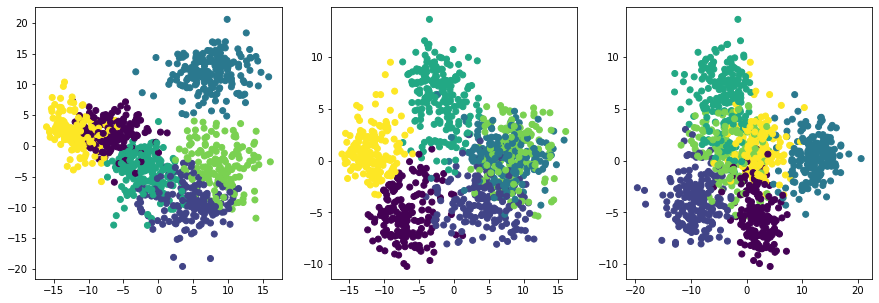

In [ ]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,3,1)
ax1.scatter(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], c = clusters)

ax2 = fig.add_subplot(1,3,2)
ax2.scatter(y_vectors_transformed[:, 0], y_vectors_transformed[:, 2], c = clusters)

ax2 = fig.add_subplot(1,3,3)
ax2.scatter(y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], c = clusters)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [70.0, 70.0, 100.0, 100.0],
  [21.875, 21.875, 85.0, 85.0],
  [125.0, 125.0, 135.0, 135.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [153.75, 153.75, 200.0, 200.0],
  [130.0, 130.0, 176.875, 176.875],
  [53.4375, 53.4375, 153.4375, 153.4375],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [270.0, 270.0, 310.0, 310.0],
  [232.5, 232.5, 290.0, 290.0],
  [335.0, 335.

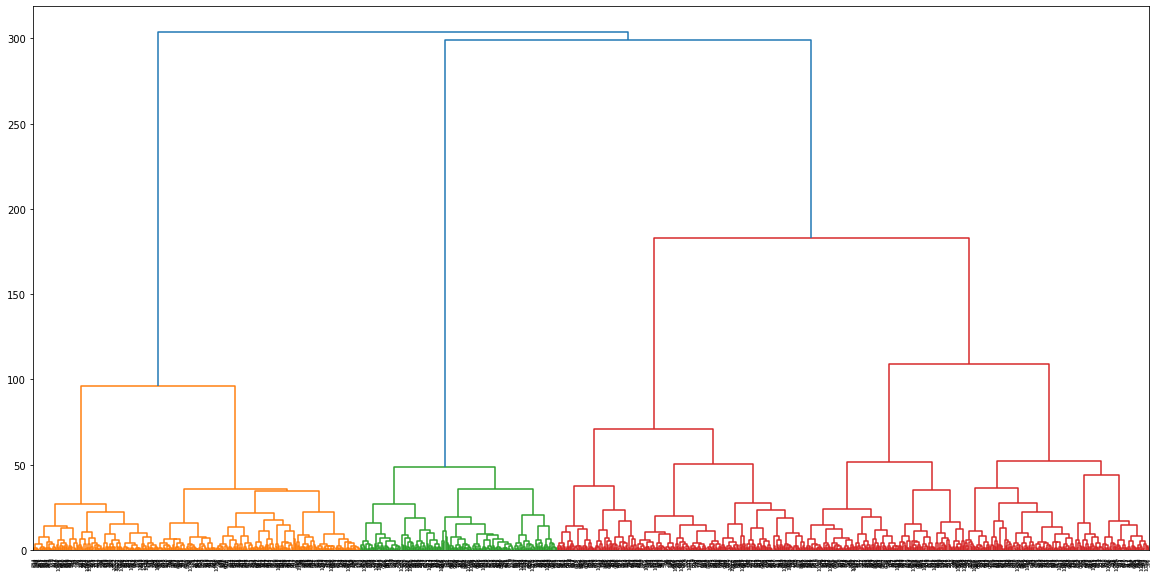

In [ ]:
plt.figure(figsize = (20, 10))
dendrogram(linkage(y_vectors_transformed[:, :3], method = 'ward'))

In [ ]:
hierarch = AgglomerativeClustering(n_clusters = 6)
clusters = hierarch.fit_predict(y_vectors_transformed[:, :3])

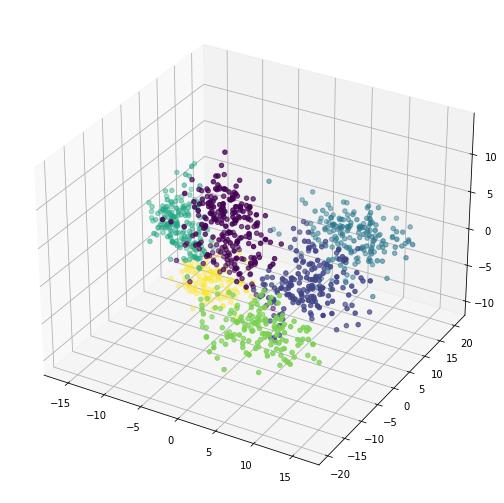

In [ ]:
y_vectors_transformed = pca.transform(y_vectors)
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], c = clusters)

In [ ]:
fig = px.scatter_3d(pd.DataFrame(zip(y_vectors_transformed[:, 0], y_vectors_transformed[:, 1], y_vectors_transformed[:, 2], clusters), columns=['PCA 0', 'PCA 1', 'PCA 2', 'color']),
                    x='PCA 0', y='PCA 1', z='PCA 2',
                    color='color')
fig.update_traces(marker_size = 3)
fig.show()

## Тест модели

In [ ]:
N_classes = 4

In [ ]:
signals = np.genfromtxt('/content/drive/MyDrive/Unивerchик/np_signals.txt')
labels = np.genfromtxt('/content/drive/MyDrive/Unивerchик/np_lables.txt')

In [ ]:
signals_bad = signals[np.isin(labels, [0,1,2,3])]
labels_bad = labels[np.isin(labels, [0,1,2,3])]

signals_good = signals[np.isin(labels, [1,2,4,5])]
labels_good = labels[np.isin(labels, [1,2,4,5])]

In [ ]:
labels_good[labels_good == 1] = 0
labels_good[labels_good == 2] = 1
labels_good[labels_good == 4] = 2
labels_good[labels_good == 5] = 3

In [ ]:
labels_bad.shape, labels_good.shape

((3454,), (3639,))

In [ ]:
labels_bad = keras.utils.to_categorical(labels_bad, num_classes=N_classes)
labels_good = keras.utils.to_categorical(labels_good, num_classes=N_classes)

In [ ]:
labels_bad.shape, labels_good.shape

((3454, 4), (3639, 4))

In [ ]:
X_train_bad, X_test_bad, y_train_bad, y_test_bad = train_test_split(signals_bad, labels_bad, test_size=0.2, random_state=34, stratify=labels_bad, shuffle=True)
X_train_good, X_test_good, y_train_good, y_test_good = train_test_split(signals_good, labels_good, test_size=0.2, random_state=34, stratify=labels_good, shuffle=True)

In [ ]:
X_train_bad.shape, X_train_good.shape

((2763, 2000), (2911, 2000))

In [ ]:
np.concatenate((X_test_good, y_test_good), axis= 1).shape

(728, 2004)

In [ ]:
model_test_bad = Sequential()
model_test_bad.add(InputLayer(input_shape=(2000, )))
model_test_bad.add(Reshape((2000,1),input_shape=(2000,)))
model_test_bad.add(BatchNormalization())
model_test_bad.add(Conv1D(25,40, activation='elu',padding='same', strides=2)) # количество фильтров, длинна фильтра 'relu' #25
model_test_bad.add(Conv1D(25,20, activation='elu',padding='same'))#25
model_test_bad.add(Conv1D(20,20, activation='elu',padding='same', strides=2))#25
model_test_bad.add(Conv1D(25,20, activation='elu',padding='same'))#25
model_test_bad.add(BatchNormalization())
model_test_bad.add(MaxPooling1D(2))
model_test_bad.add(Conv1D(20,20, activation='elu',padding='same'))#25
model_test_bad.add(Conv1D(40,20, activation='elu',padding='same'))#40
model_test_bad.add(Conv1D(100,20, activation='elu',padding='same'))#100
model_test_bad.add(Dropout(0.5))
model_test_bad.add(BatchNormalization())
model_test_bad.add(MaxPooling1D(2))
model_test_bad.add(GlobalMaxPooling1D())
model_test_bad.add(Dense(N_classes, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0009,amsgrad = 'false') # Defaults to 0.001.
model_test_bad.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_test_bad.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 2000, 1)           0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 2000, 1)           4         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 1000, 25)          1025      
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 1000, 25)          12525     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 500, 20)           10020     
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 500, 25)           10025     
_________________________________________________________________
batch_normalization_10 (Batc (None, 500, 25)          

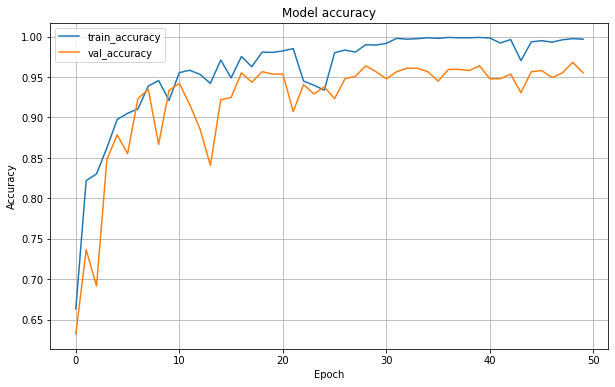

[0.6324167847633362, 0.7366136312484741, 0.6917510628700256, 0.8480463027954102, 0.8784370422363281, 0.855282187461853, 0.9232995510101318, 0.9348769783973694, 0.8668596148490906, 0.9334298372268677, 0.9421128630638123, 0.916063666343689, 0.885672926902771, 0.8408104181289673, 0.9218524098396301, 0.9247467517852783, 0.9551374912261963, 0.9435600638389587, 0.956584632396698, 0.9536902904510498, 0.9536902904510498, 0.9073805809020996, 0.9406657218933105, 0.929088294506073, 0.9377713203430176, 0.9232995510101318, 0.9479016065597534, 0.9507959485054016, 0.9638205766677856, 0.956584632396698, 0.9479016065597534, 0.956584632396698, 0.9609261751174927, 0.9609261751174927, 0.956584632396698, 0.9450072646141052, 0.959479033946991, 0.959479033946991, 0.9580318331718445, 0.9638205766677856, 0.9479016065597534, 0.9479016065597534, 0.9536902904510498, 0.9305354356765747, 0.956584632396698, 0.9580318331718445, 0.9493487477302551, 0.9551374912261963, 0.9681620597839355, 0.9551374912261963]


In [ ]:
EPOCHS = 50
BATCH_SIZE = 30

model_checkpoint_callback = model_checkpoint_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=EPOCHS,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

history = model_test_bad.fit(X_train_bad, y_train_bad, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(X_test_bad, y_test_bad), callbacks=[model_checkpoint_callback])
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
print(history.history['val_accuracy'])

In [ ]:
model_test_bad_vec = Sequential()
model_test_bad_vec.add(InputLayer(input_shape=(2000, )))
model_test_bad_vec.add(Reshape((2000,1),input_shape=(2000,)))
model_test_bad_vec.add(BatchNormalization())
model_test_bad_vec.add(Conv1D(25,40, activation='elu',padding='same', strides=2)) # количество фильтров, длинна фильтра 'relu' #25
model_test_bad_vec.add(Conv1D(25,20, activation='elu',padding='same'))#25
model_test_bad_vec.add(Conv1D(20,20, activation='elu',padding='same', strides=2))#25
model_test_bad_vec.add(Conv1D(25,20, activation='elu',padding='same'))#25
model_test_bad_vec.add(BatchNormalization())
model_test_bad_vec.add(MaxPooling1D(2))
model_test_bad_vec.add(Conv1D(20,20, activation='elu',padding='same'))#25
model_test_bad_vec.add(Conv1D(40,20, activation='elu',padding='same'))#40
model_test_bad_vec.add(Conv1D(100,20, activation='elu',padding='same'))#100
model_test_bad_vec.add(Dropout(0.5))
model_test_bad_vec.add(BatchNormalization())
model_test_bad_vec.add(MaxPooling1D(2))
model_test_bad_vec.add(GlobalMaxPooling1D())
model_test_bad_vec.add(Dense(N_classes, activation='linear'))

In [ ]:
model_test_bad_vec.set_weights(model_test_bad.get_weights())

In [ ]:
model_test_good = Sequential()
model_test_good.add(InputLayer(input_shape=(2000, )))
model_test_good.add(Reshape((2000,1),input_shape=(2000,)))
model_test_good.add(BatchNormalization())
model_test_good.add(Conv1D(25,40, activation='elu',padding='same', strides=2)) # количество фильтров, длинна фильтра 'relu' #25
model_test_good.add(Conv1D(25,20, activation='elu',padding='same'))#25
model_test_good.add(Conv1D(20,20, activation='elu',padding='same', strides=2))#25
model_test_good.add(Conv1D(25,20, activation='elu',padding='same'))#25
model_test_good.add(BatchNormalization())
model_test_good.add(MaxPooling1D(2))
model_test_good.add(Conv1D(20,20, activation='elu',padding='same'))#25
model_test_good.add(Conv1D(40,20, activation='elu',padding='same'))#40
model_test_good.add(Conv1D(100,20, activation='elu',padding='same'))#100
model_test_good.add(Dropout(0.5))
model_test_good.add(BatchNormalization())
model_test_good.add(MaxPooling1D(2))
model_test_good.add(GlobalMaxPooling1D())
model_test_good.add(Dense(N_classes, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0009,amsgrad = 'false') # Defaults to 0.001.
model_test_good.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_test_good.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 2000, 1)           0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 2000, 1)           4         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 1000, 25)          1025      
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 1000, 25)          12525     
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 500, 20)           10020     
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 500, 25)           10025     
_________________________________________________________________
batch_normalization_16 (Batc (None, 500, 25)          

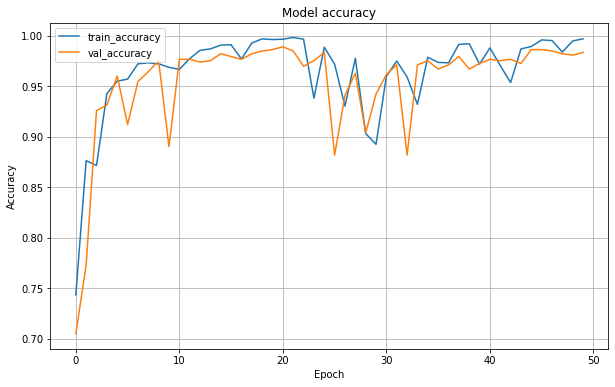

[0.7046703100204468, 0.7733516693115234, 0.9258241653442383, 0.9313187003135681, 0.9601648449897766, 0.9120879173278809, 0.9546703100204468, 0.9642857313156128, 0.9752747416496277, 0.8901098966598511, 0.9766483306884766, 0.9766483306884766, 0.973901093006134, 0.9752747416496277, 0.9821428656578064, 0.9793956279754639, 0.9766483306884766, 0.9821428656578064, 0.9848901033401489, 0.9862637519836426, 0.9890109896659851, 0.9848901033401489, 0.9697802066802979, 0.9752747416496277, 0.9835164546966553, 0.8818681240081787, 0.9409340620040894, 0.9629120826721191, 0.9038461446762085, 0.942307710647583, 0.9615384340286255, 0.9711538553237915, 0.8818681240081787, 0.9711538553237915, 0.9752747416496277, 0.9670329689979553, 0.9711538553237915, 0.9793956279754639, 0.9670329689979553, 0.9725274443626404, 0.9766483306884766, 0.9752747416496277, 0.9766483306884766, 0.9725274443626404, 0.9862637519836426, 0.9862637519836426, 0.9848901033401489, 0.9821428656578064, 0.9807692170143127, 0.9835164546966553]


In [ ]:
EPOCHS = 50
BATCH_SIZE = 30

model_checkpoint_callback = model_checkpoint_callback = model_checkpoint_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=EPOCHS,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

history = model_test_good.fit(X_train_good, y_train_good, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(X_test_good, y_test_good), callbacks=[model_checkpoint_callback])
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
print(history.history['val_accuracy'])

In [ ]:
model_test_good_vec = Sequential()
model_test_good_vec.add(InputLayer(input_shape=(2000, )))
model_test_good_vec.add(Reshape((2000,1),input_shape=(2000,)))
model_test_good_vec.add(BatchNormalization())
model_test_good_vec.add(Conv1D(25,40, activation='elu',padding='same', strides=2)) # количество фильтров, длинна фильтра 'relu' #25
model_test_good_vec.add(Conv1D(25,20, activation='elu',padding='same'))#25
model_test_good_vec.add(Conv1D(20,20, activation='elu',padding='same', strides=2))#25
model_test_good_vec.add(Conv1D(25,20, activation='elu',padding='same'))#25
model_test_good_vec.add(BatchNormalization())
model_test_good_vec.add(MaxPooling1D(2))
model_test_good_vec.add(Conv1D(20,20, activation='elu',padding='same'))#25
model_test_good_vec.add(Conv1D(40,20, activation='elu',padding='same'))#40
model_test_good_vec.add(Conv1D(100,20, activation='elu',padding='same'))#100
model_test_good_vec.add(Dropout(0.5))
model_test_good_vec.add(BatchNormalization())
model_test_good_vec.add(MaxPooling1D(2))
model_test_good_vec.add(GlobalMaxPooling1D())
model_test_good_vec.add(Dense(N_classes, activation='linear'))

In [ ]:
model_test_good_vec.set_weights(model_test_good.get_weights())

In [ ]:
y_vectors_bad = model_test_bad_vec.predict(X_test_bad)
y_vectors_good = model_test_good_vec.predict(X_test_good)

In [ ]:
pca_bad = PCA()
pca_good = PCA()
pca_bad.fit(y_vectors_bad)
pca_good.fit(y_vectors_good)

PCA()

<BarContainer object of 4 artists>

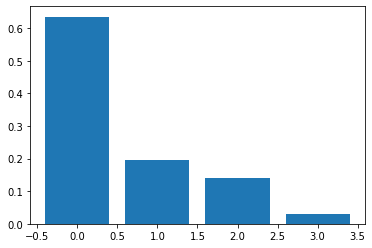

In [ ]:
plt.bar(range(4), pca_bad.explained_variance_ratio_)

<BarContainer object of 4 artists>

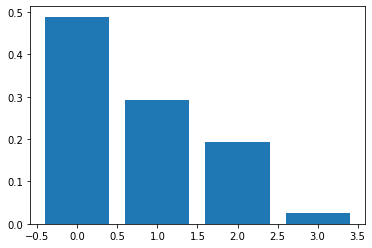

In [ ]:
plt.bar(range(4), pca_good.explained_variance_ratio_)

In [ ]:
y_vectors_transformed_bad = pca_bad.transform(y_vectors_bad)
y_vectors_transformed_good = pca_good.transform(y_vectors_good)

In [ ]:
fig = px.scatter_3d(pd.DataFrame(zip(y_vectors_transformed_bad[:, 0], y_vectors_transformed_bad[:, 1], y_vectors_transformed_bad[:, 2], y_test_bad.argmax(axis=1)), columns=['PCA 0', 'PCA 1', 'PCA 2', 'color']),
                    x='PCA 0', y='PCA 1', z='PCA 2',
                    color='color')
fig.update_traces(marker_size = 3)
fig.show()

In [ ]:
fig = px.scatter_3d(pd.DataFrame(zip(y_vectors_transformed_good[:, 0], y_vectors_transformed_good[:, 1], y_vectors_transformed_good[:, 2], y_test_good.argmax(axis=1)), columns=['PCA 0', 'PCA 1', 'PCA 2', 'color']),
                    x='PCA 0', y='PCA 1', z='PCA 2',
                    color='color')
fig.update_traces(marker_size = 3)
fig.show()

## Проведение гипотезы

In [ ]:
accuracy_list_bad = []
accuracy_list_good = []
bootstrap_count = 2000
bootstrap_size_bad = int(X_test_bad.shape[0] * 0.6)
bootstrap_size_good = int(X_test_good.shape[0] * 0.6)

data_bad = np.concatenate((X_test_bad, y_test_bad), axis = 1)
data_good = np.concatenate((X_test_good, y_test_good), axis = 1)
for i in range(0, bootstrap_count):
  data_bad_boot = resample(data_bad, replace = True, n_samples = bootstrap_size_bad)
  y_pred_bad = model_test_bad.predict(data_bad_boot[:, :-4])
  y_pred_bad = y_pred_bad.argmax(axis = 1)
  acc = Accuracy(name = 'bad')
  acc.update_state(data_bad_boot[:, -4:].argmax(axis = 1), y_pred_bad)
  accuracy_list_bad.append(acc.result().numpy())

for i in range(0, bootstrap_count):
  data_good_boot = resample(data_good, replace = True, n_samples = bootstrap_size_good)
  y_pred_good = model_test_good.predict(data_good_boot[:, :-4])
  y_pred_good = y_pred_good.argmax(axis = 1)
  acc = Accuracy(name = 'good')
  acc.update_state(data_good_boot[:, -4:].argmax(axis = 1), y_pred_good)
  accuracy_list_good.append(acc.result().numpy())

In [ ]:
accuracy_list_bad = np.array(accuracy_list_bad).reshape((-1,1))
accuracy_list_good = np.array(accuracy_list_good).reshape((-1,1))

In [ ]:
scaler_bad = StandardScaler()
scaler_good = StandardScaler()
accuracy_list_bad_scaled = scaler_bad.fit_transform(accuracy_list_bad)
accuracy_list_good_scaled = scaler_bad.fit_transform(accuracy_list_good)


In [ ]:
from scipy.stats import shapiro, normaltest, ttest_ind, mannwhitneyu
print(mannwhitneyu(accuracy_list_bad.flatten(), accuracy_list_good.flatten()))
print(mannwhitneyu(accuracy_list_bad.flatten(), accuracy_list_good.flatten(), alternative = 'less'))

MannwhitneyuResult(statistic=26408.0, pvalue=0.0)
MannwhitneyuResult(statistic=26408.0, pvalue=0.0)


In [ ]:
print(ttest_ind(accuracy_list_bad.flatten(), accuracy_list_good.flatten()))
print(ttest_ind(accuracy_list_bad.flatten(), accuracy_list_good.flatten(), alternative = 'less'))

Ttest_indResult(statistic=-106.45628287451042, pvalue=0.0)
Ttest_indResult(statistic=-106.45628287451042, pvalue=0.0)


<AxesSubplot:ylabel='Count'>

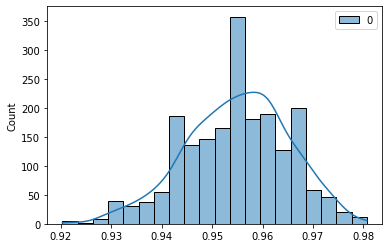

In [ ]:
sns.histplot(accuracy_list_bad, bins = int(20), kde = True)

<AxesSubplot:ylabel='Count'>

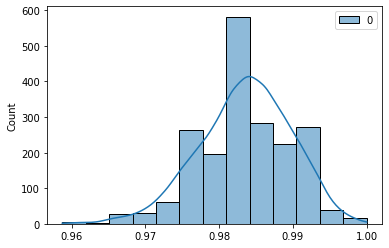

In [ ]:
sns.histplot(accuracy_list_good, bins = int(13), kde = True)

<AxesSubplot:>

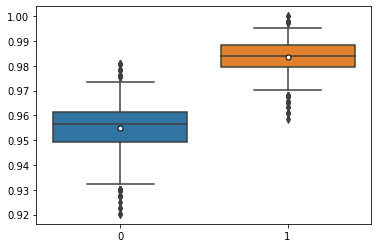

In [ ]:
sns.boxplot(data=[accuracy_list_bad,accuracy_list_good],
            whis=[2.5, 97.5],
            showmeans = True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"})

In [ ]:
accuracy_list_bad.mean(), accuracy_list_good.mean()

(0.9550061, 0.98351264)

In [ ]:
lower =  np.percentile(accuracy_list_bad, 2.5)
upper =  np.percentile(accuracy_list_bad, 97.5)
print('%.1f confidence interval %.5f and %.5f' % (95, lower, upper))

95.0 confidence interval 0.93237 and 0.97343


In [ ]:
lower =  np.percentile(accuracy_list_good, 2.5)
upper =  np.percentile(accuracy_list_good, 97.5)
print('%.1f confidence interval %.5f and %.5f' % (95, lower, upper))

95.0 confidence interval 0.97018 and 0.99541


In [ ]:
lower =  np.percentile(accuracy_list_good-accuracy_list_bad, 2.5)
upper =  np.percentile(accuracy_list_good-accuracy_list_bad, 97.5)
print('%.1f confidence interval %.5f and %.5f' % (95, lower, upper))

95.0 confidence interval 0.00593 and 0.05326


In [ ]:
accuracy_mean_bad = []
accuracy_mean_good = []
bootstrap_count = 300
bootstrap_size_mean_bad = int(accuracy_list_bad.shape[0] * 0.6)
bootstrap_size_mean_good = int(accuracy_list_good.shape[0] * 0.6)

for i in range(0, bootstrap_count):
  data_bad_boot = resample(accuracy_list_bad, replace = True, n_samples = bootstrap_size_bad)
  accuracy_mean_bad.append(data_bad_boot.mean())

for i in range(0, bootstrap_count):
  data_good_boot = resample(accuracy_list_good, replace = True, n_samples = bootstrap_size_good)
  accuracy_mean_good.append(data_good_boot.mean())

99.5

In [ ]:
accuracy_mean_bad = np.array(accuracy_mean_bad)
accuracy_mean_good = np.array(accuracy_mean_good)

<AxesSubplot:ylabel='Count'>

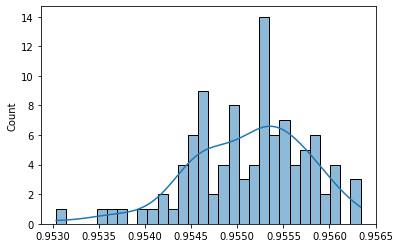

In [ ]:
sns.histplot(accuracy_mean_bad, bins = int(30), kde = True)

<AxesSubplot:ylabel='Count'>

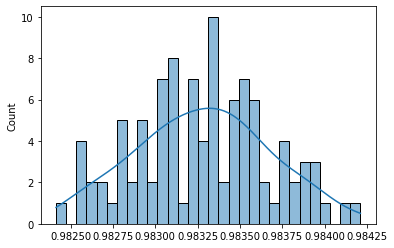

In [ ]:
sns.histplot(accuracy_mean_good, bins = int(30), kde = True)

<AxesSubplot:ylabel='Count'>

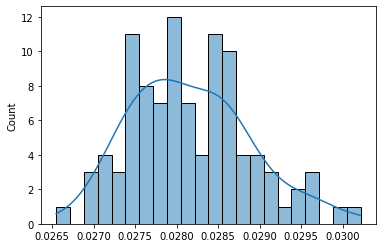

In [ ]:
sns.histplot(accuracy_mean_good-accuracy_mean_bad, bins = int(22), kde = True)

<AxesSubplot:>

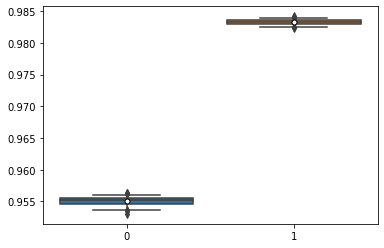

In [ ]:
sns.boxplot(data = [accuracy_mean_bad, accuracy_mean_good],
            showmeans = True,
            whis = [2.5,97.5],
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"})

<AxesSubplot:>

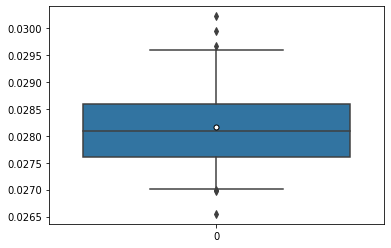

In [ ]:
sns.boxplot(data = accuracy_mean_good-accuracy_mean_bad,
            showmeans = True,
            whis = [2.5,97.5],
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"})

In [ ]:
lower =  np.percentile(accuracy_mean_bad, 2.5)
upper =  np.percentile(accuracy_mean_bad, 97.5)
print('%.1f confidence interval %.5f and %.5f' % (95, lower, upper))

95.0 confidence interval 0.95368 and 0.95616


In [ ]:
lower =  np.percentile(accuracy_mean_good, 2.5)
upper =  np.percentile(accuracy_mean_good, 97.5)
print('%.1f confidence interval %.5f and %.5f' % (95, lower, upper))

95.0 confidence interval 0.98256 and 0.98396


In [ ]:
lower =  np.percentile(accuracy_mean_good-accuracy_mean_bad, 2.5)
upper =  np.percentile(accuracy_mean_good-accuracy_mean_bad, 97.5)
print('%.1f confidence interval %.5f and %.5f' % (95, lower, upper))

95.0 confidence interval 0.02700 and 0.02963


In [ ]:
accuracy_mean_bad.mean()

0.95511866

In [ ]:
accuracy_mean_good.mean()

0.98327965

In [ ]:
(accuracy_mean_good-accuracy_mean_bad).mean()

0.028161066

In [ ]:
print(mannwhitneyu(accuracy_mean_bad.flatten(), accuracy_mean_good.flatten()))
print(mannwhitneyu(accuracy_mean_bad.flatten(), accuracy_mean_good.flatten(), alternative = 'less'))

MannwhitneyuResult(statistic=0.0, pvalue=2.5572411285812604e-34)
MannwhitneyuResult(statistic=0.0, pvalue=1.2786205642906302e-34)


In [ ]:
print(ttest_ind(accuracy_mean_bad.flatten(), accuracy_mean_good.flatten()))
print(ttest_ind(accuracy_mean_bad.flatten(), accuracy_mean_good.flatten(), alternative = 'less'))

Ttest_indResult(statistic=-379.71636069912586, pvalue=2.1441859035053868e-285)
Ttest_indResult(statistic=-379.71636069912586, pvalue=1.0720929517526934e-285)
